In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
"""
sequence data-data tht comes in a particular order
"""
#df_1 = pd.read_csv('apple_stock.csv', parse_dates=True, index_col=[0])

'\nsequence data-data tht comes in a particular order\n'

In [3]:
#df_1.head()

In [4]:
#df_1 = pd.read_csv('apple_2012_1_1-2019_12_17.csv', parse_dates=True, index_col=[0])

In [5]:
#apple_training = df_1['2012-1-1':'2018-1-1']

In [6]:
#apple_training.head()

In [7]:
df_1 = pd.read_csv('data/vinda.csv', parse_dates=True, index_col=[0])
df_data = df_1.sort_index(ascending=True, axis=0)

In [8]:
apple_training_processed = df_data['Close']

In [9]:
df = pd.DataFrame(apple_training_processed)

In [10]:
print(df.shape)
print(len(df) *0.2) 

(1235, 1)
247.0


## Train Test Split

In [11]:
test_percent = 0.2 
len(df) * test_percent
test_point = np.round(len(df) * test_percent)
test_ind = int(len(df) - test_point)
train = df.iloc[:test_ind]
test = df.iloc[test_ind:] #test_ind point and go to end
train.shape, test.shape

((988, 1), (247, 1))

## Normalize Data

In [12]:
#nned to scale label b/c it's being fed back into neuron
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit_transform(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [14]:
# df.plot(figsize=(12,8));
# plt.title('Closing Price History');
# plt.ylabel('Closnig Price USD ($)')

## Create TimeSeriesGenerator
Creating 2 generators 1 for training data and 1 for validation or test data.<br>

In [15]:
from keras.callbacks import EarlyStopping

In [16]:
"""
take train batches and tansform them into sequences


"""
from keras.preprocessing.sequence import TimeseriesGenerator

In [17]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [18]:
print(scaled_train.shape)
print(scaled_test.shape)

(988, 1)
(247, 1)


In [19]:
"""
-take training data and create batches for training purposes off of it
-it generates batches for sequence data

-length-lenght of output sequences. Number of time steps.
-batch_size -number of time series sample in each batch

-how many sequences per batch?

forecasting technique-predcit a timestep ahead.  Then incorporate our prediction into the next sequence we predcit off of
    You're forecasting on forecasts


length of batch needs to be less than lenght of test set
can't feed in a batch of 151 days and get a predicton on 152nd day
batches need to be shortd than 151

We'll pas in 1 at a time
test=400
create for training data
"""
length =30  #length of output sequences in the number of timestep. # of timeseries samples in each batch
batch_size = 1 #how many time series samples are we returning in each batch

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)#batch_size-1 array for X and 1 value for y
                                                                                         #if this were 2, you'd get 2 sets for X and 2 for y
    
    
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=batch_size)    

In [20]:
len(scaled_train)

988

In [21]:
"""
generator object is going to geneate batches for us
ie. if length =2, then 1207-2 = 1205
ie, if length=60, thrn 1207-60=1147
"""
len(generator)

958

In [22]:
X,y = generator[0]

In [23]:
#30 lists of length 30
X

array([[[0.46807574],
        [0.46587406],
        [0.50638485],
        [0.50550418],
        [0.50022017],
        [0.4878908 ],
        [0.52267723],
        [0.54205196],
        [0.50154117],
        [0.52135623],
        [0.49405548],
        [0.55306033],
        [0.53896962],
        [0.5336856 ],
        [0.52619991],
        [0.54909731],
        [0.54029062],
        [0.57287539],
        [0.58872743],
        [0.57199472],
        [0.53632761],
        [0.50814619],
        [0.50594452],
        [0.47468076],
        [0.45706737],
        [0.36679877],
        [0.36371642],
        [0.39674152],
        [0.36900044],
        [0.37604579]]])

In [24]:
len(y)

1

## Create the Model

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [26]:

n_features = 1

# model = Sequential()

# model.add(LSTM(units = 50, return_sequences = True, input_shape=(length, n_features)))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 50, return_sequences = False))
# model.add(Dropout(0.2))

# model.add(Dense(units = 25))
# model.add(Dense(units = 1))

# model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(length, n_features)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')


In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.callbacks import EarlyStopping

In [29]:
#early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [30]:
len(scaled_test), length

(247, 30)

In [31]:
#create generator for scaled_test/validation set

#length = 300
"""
scaled data test set must be greater than the length of the batches
lenght of batches can't be same size as test set. must be at least 1 shorter than scaled_test data

"""

#validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=batch_size)

"\nscaled data test set must be greater than the length of the batches\nlenght of batches can't be same size as test set. must be at least 1 shorter than scaled_test data\n\n"

In [32]:
model.fit_generator(generator, epochs=10, validation_data=validation_generator,callbacks=[early_stop]) #,callbacks=[early_stop]

Epoch 1/10
958/958 [==============================] - 80s 84ms/step - loss: 0.0043 - val_loss: 0.0066
Epoch 2/10
958/958 [==============================] - 71s 75ms/step - loss: 0.0017 - val_loss: 0.0042
Epoch 3/10
958/958 [==============================] - 72s 76ms/step - loss: 0.0012 - val_loss: 0.0032
Epoch 4/10
958/958 [==============================] - 77s 81ms/step - loss: 0.0011 - val_loss: 0.0038
Epoch 5/10
958/958 [==============================] - 75s 78ms/step - loss: 8.6315e-04 - val_loss: 0.0046


In [33]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

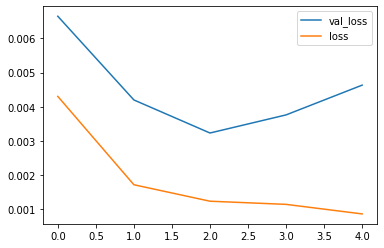

In [34]:
losses.plot()

### Evaluate on Test Data
Forecast predictions for the test data range(-- days of the entire dataset).<br>
Final result will be DataFrame with 2 columns, true test values and the predictions.<br>

In [35]:
"""
evaluate test predictions
"""

test_predictions = []

#last 60 days of train set to predcit 1 day in the future, which is 1st point in test set
#ie 24, would be last 24 days of training data. 24 days to predict 1 day into the future
first_eval_batch = scaled_train[-length:] #should be in last batch if training data
#change 1
# 1 time series per batch(batch_size), length, n_features=1
current_batch = first_eval_batch.reshape((1,length, n_features)) #reshape to correct format. 1 item per batch

for i in range(len(test)): #only forecasting on test set
    #get hte predcition 1 timestamp ahead.
    current_pred = model.predict(current_batch)[0] #to be current prediction
    
    test_predictions.append(current_pred) #take current_pred and append to list
    #in order to keep predicintg into future need to move current batch forward 1 timestep
    #gets rid of 1st item and replaces it with current prediction all the way to the very end
    #drops 1st value in current_batch
    #append curent predcition value. Moves current_batch 1 value into the future
    #true forecast is predciting off predictions
    #1-grab everythin but index 0
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)


In [36]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
#test['LSTM Predictions'] = true_predictions

In [38]:
"""
true and predictions
"""
test.head(25)

,Close,LSTM Predictions
Date,,
2017-10-10,208.45,205.458614
2017-10-11,209.40,202.355708
2017-10-12,212.00,199.498402
2017-10-13,210.25,197.057755
2017-10-16,209.60,194.981970
2017-10-17,210.30,193.151718
2017-10-18,206.80,191.454669
2017-10-19,204.60,189.811102
2017-10-23,203.10,188.170452


<AxesSubplot:xlabel='Date'>

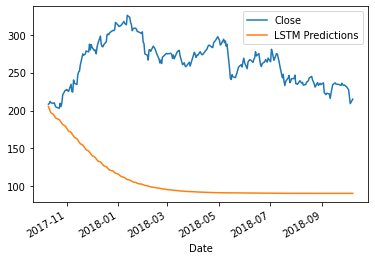

In [39]:
"""
blue is what we know true values for
"""
# test['Close'].plot(figsize=(12,8))
# test['LSTM Predictions'].plot()
test.plot()

#### Calculate RMSE

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
#how accurate model predicts reponse
rmse = np.sqrt(mean_squared_error(test['Close'],test['LSTM Predictions']))
rmse

160.96996427784612

## Forecast into Unknown Future
Need to retrain on all the data.<br>

In [42]:
"""
full dataframe transformed
"""
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [43]:
scaled_train

array([[0.46807574],
       [0.46587406],
       [0.50638485],
       [0.50550418],
       [0.50022017],
       [0.4878908 ],
       [0.52267723],
       [0.54205196],
       [0.50154117],
       [0.52135623],
       [0.49405548],
       [0.55306033],
       [0.53896962],
       [0.5336856 ],
       [0.52619991],
       [0.54909731],
       [0.54029062],
       [0.57287539],
       [0.58872743],
       [0.57199472],
       [0.53632761],
       [0.50814619],
       [0.50594452],
       [0.47468076],
       [0.45706737],
       [0.36679877],
       [0.36371642],
       [0.39674152],
       [0.36900044],
       [0.37604579],
       [0.36107442],
       [0.34478203],
       [0.35006605],
       [0.3773668 ],
       [0.37340379],
       [0.39630119],
       [0.40730956],
       [0.41083223],
       [0.3888155 ],
       [0.37780713],
       [0.3874945 ],
       [0.38353148],
       [0.38793483],
       [0.39453985],
       [0.39057684],
       [0.38837517],
       [0.37428446],
       [0.359

In [44]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=batch_size)

In [45]:

n_features = 1

# model = Sequential()

# model.add(LSTM(units = 50, return_sequences = True, input_shape=(length, n_features)))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# model.add(LSTM(units = 50, return_sequences = False))
# model.add(Dropout(0.2))

# model.add(Dense(units = 25))
# model.add(Dense(units = 1))

# model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(length, n_features)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')


In [46]:
model.fit_generator(generator, epochs=2)

Epoch 1/2
1205/1205 [==============================] - 81s 67ms/step - loss: 0.0025
Epoch 2/2
1205/1205 [==============================] - 76s 63ms/step - loss: 0.0013


In [47]:
forecast = []
periods = 30 #forecasting off predeiciotns, adding in more predictions
             #forecast length should be the same as test length
            #should equal intial batch length

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods): #how many spaces do I want to prdict into the future
    current_pred = model.predict(current_batch)[0] #to be current prediction
    
    forecast.append(current_pred) #take current_pred and append to list
    #in order to keep predicintg into future need to move current batch forward 1 timestep
    #gets rid of 1st item and replaces it with current prediction all the way to the very end
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)


In [48]:
#inverse scale 
forecast = scaler.inverse_transform(forecast)

In [49]:
df

,Close
Date,
2013-10-08,155.80
2013-10-09,155.55
2013-10-10,160.15
2013-10-11,160.05
2013-10-14,159.45
...,...
2018-10-01,230.90
2018-10-03,227.60
2018-10-04,218.20


In [50]:
#going into 2020
forecast

array([[162.10305889],
       [161.57014488],
       [161.53776625],
       [161.72617683],
       [162.01501935],
       [162.34831479],
       [162.69702123],
       [163.04478012],
       [163.38248161],
       [163.70465706],
       [164.0097295 ],
       [164.29775308],
       [164.57024385],
       [164.82936761],
       [165.07752704],
       [165.3178896 ],
       [165.55325054],
       [165.78561997],
       [166.01685236],
       [166.24851114],
       [166.4817875 ],
       [166.71750038],
       [166.95629951],
       [167.19834734],
       [167.44377922],
       [167.69260868],
       [167.94459209],
       [168.19951286],
       [168.45694459],
       [168.71661657]])

In [51]:
df.tail()

,Close
Date,
2018-10-01,230.90
2018-10-03,227.60
2018-10-04,218.20
2018-10-05,209.20
2018-10-08,215.15


In [52]:
#build forecast index
#forecasting off predictions
#period should be equal to intial batch ength
forecast_index = pd.date_range(start='2018-10-09',periods=periods, freq='B')

In [53]:
forecast_index

DatetimeIndex(['2018-10-09', '2018-10-10', '2018-10-11', '2018-10-12',
               '2018-10-15', '2018-10-16', '2018-10-17', '2018-10-18',
               '2018-10-19', '2018-10-22', '2018-10-23', '2018-10-24',
               '2018-10-25', '2018-10-26', '2018-10-29', '2018-10-30',
               '2018-10-31', '2018-11-01', '2018-11-02', '2018-11-05',
               '2018-11-06', '2018-11-07', '2018-11-08', '2018-11-09',
               '2018-11-12', '2018-11-13', '2018-11-14', '2018-11-15',
               '2018-11-16', '2018-11-19'],
              dtype='datetime64[ns]', freq='B')

In [54]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index, columns=['Forecast'])

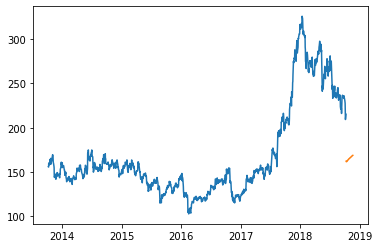

In [55]:
plt.plot(df.index, df['Close'])
plt.plot(forecast_index, forecast)
#forecast_df.plot()

In [56]:
# ax=df.plot()
# forecast_df.plot(ax=ax)

<AxesSubplot:xlabel='Date'>

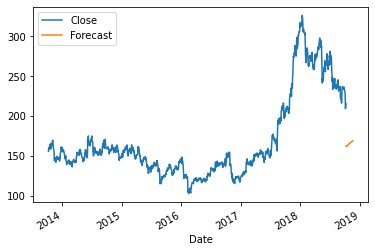

In [57]:
ax=df.plot()
forecast_df.plot(ax=ax)
#plt.xlim('2019-12-18','2020-04-01')

## New Model

In [58]:
df_1 = pd.read_csv('data/vinda.csv', parse_dates=True, index_col=[0])
df_data = df_1.sort_index(ascending=True, axis=0)

In [59]:
df_data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [60]:
df_data.tail()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83


In [61]:
df_data.shape

(1235, 7)

In [62]:
df_tataglobal = df_data['Close']
df_tataglobal = pd.DataFrame(df_tataglobal)

In [63]:
len(df_tataglobal) * .20

247.0

In [64]:
1235 - 987

248

In [65]:
test_percent = 0.2 
len(df_tataglobal) * test_percent
test_point = np.round(len(df_tataglobal) * test_percent)
test_ind = int(len(df_tataglobal) - test_point)
train = df_tataglobal.iloc[:test_ind]
valid = df_tataglobal.iloc[test_ind:] #test_ind point and go to end
train.shape, valid.shape

((988, 1), (247, 1))

In [66]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_tataglobal)


In [67]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [68]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [69]:
model.fit(x_train, y_train, epochs=2, batch_size=1, verbose=2)

Epoch 1/2
 - 121s - loss: 0.0011
Epoch 2/2
 - 124s - loss: 4.9171e-04


In [70]:
#predicting 246 values, using past 60 from the train data
inputs = df_tataglobal[len(df_tataglobal) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)


In [71]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

Close    16.225262
dtype: float64

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


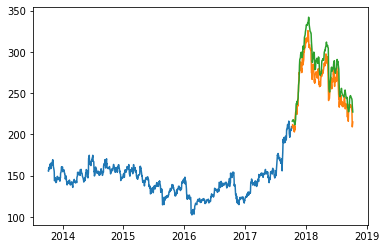

In [72]:
#for plotting
train = df_tataglobal.iloc[:test_ind]
valid = df_tataglobal.iloc[test_ind:] #test_ind point and go to end
# train = df_tataglobal[:987]
# valid = df_tataglobal[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [ ]:
#df_ = pd.read_csv('apple_2012_1_1-2019_12_17.csv', parse_dates=True, index_col=[0])